# Task for normalisation and z-score 
## Find 10000 row dataset and apply same task in the 10000 row dataset

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
df = pd.read_csv('Sales_Records.csv')

In [3]:
df

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,Chad,Office Supplies,Online,L,1/27/2011,292494523,2/12/2011,4484,651.21,524.96,2920025.64,2353920.64,566105.00
1,Europe,Latvia,Beverages,Online,C,12/28/2015,361825549,1/23/2016,1075,47.45,31.79,51008.75,34174.25,16834.50
2,Middle East and North Africa,Pakistan,Vegetables,Offline,C,1/13/2011,141515767,2/1/2011,6515,154.06,90.93,1003700.90,592408.95,411291.95
3,Sub-Saharan Africa,Democratic Republic of the Congo,Household,Online,C,9/11/2012,500364005,10/6/2012,7683,668.27,502.54,5134318.41,3861014.82,1273303.59
4,Europe,Czech Republic,Beverages,Online,C,10/27/2015,127481591,12/5/2015,3491,47.45,31.79,165647.95,110978.89,54669.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9998,Sub-Saharan Africa,South Africa,Meat,Online,L,2/19/2017,298185956,2/22/2017,8706,421.89,364.69,3672974.34,3174991.14,497983.20
9999,Asia,Mongolia,Snacks,Offline,M,4/12/2016,824410903,4/16/2016,361,152.58,97.44,55081.38,35175.84,19905.54
10000,Sub-Saharan Africa,Democratic Republic of the Congo,Vegetables,Offline,M,2/14/2013,848579967,3/20/2013,2524,154.06,90.93,388847.44,229507.32,159340.12
10001,Sub-Saharan Africa,South Africa,Meat,Online,L,2/19/2017,298185956,2/22/2017,8706,421.89,364.69,3672974.34,3174991.14,497983.20


In [4]:
df.describe()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000300e+04,10003.000000,10003.000000,10003.000000,1.000300e+04,1.000300e+04,1.000300e+04
mean,5.499040e+08,5002.514246,268.135551,188.805303,1.333367e+06,9.383283e+05,3.950386e+05
std,2.607881e+08,2873.535898,217.922876,176.433288,1.465079e+06,1.146018e+06,3.775257e+05
min,1.000892e+08,2.000000,9.330000,6.920000,1.679400e+02,1.245600e+02,4.338000e+01
25%,3.218008e+08,2529.500000,109.280000,56.670000,2.885294e+05,1.647787e+05,9.831348e+04
50%,5.487669e+08,4961.000000,205.700000,117.110000,7.998203e+05,4.814683e+05,2.889887e+05
75%,7.761964e+08,7472.000000,437.200000,364.690000,1.819256e+06,1.183858e+06,5.663984e+05
max,9.999342e+08,10000.000000,668.270000,524.960000,6.680027e+06,5.241726e+06,1.738178e+06


In [5]:
df["Unit Price"]=df["Unit Price"].fillna(0)

In [6]:
df.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10003 entries, 0 to 10002
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          10003 non-null  object 
 1   Country         10003 non-null  object 
 2   Item Type       10003 non-null  object 
 3   Sales Channel   10003 non-null  object 
 4   Order Priority  10003 non-null  object 
 5   Order Date      10003 non-null  object 
 6   Order ID        10003 non-null  int64  
 7   Ship Date       10003 non-null  object 
 8   Units Sold      10003 non-null  int64  
 9   Unit Price      10003 non-null  float64
 10  Unit Cost       10003 non-null  float64
 11  Total Revenue   10003 non-null  float64
 12  Total Cost      10003 non-null  float64
 13  Total Profit    10003 non-null  float64
dtypes: float64(5), int64(2), object(7)
memory usage: 1.1+ MB


In [8]:
df=df.drop(["Region","Country","Sales Channel","Order Priority","Order Date","Order ID","Units Sold","Ship Date"],axis=1)

In [9]:
df

,Item Type,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Office Supplies,651.21,524.96,2920025.64,2353920.64,566105.00
1,Beverages,47.45,31.79,51008.75,34174.25,16834.50
2,Vegetables,154.06,90.93,1003700.90,592408.95,411291.95
3,Household,668.27,502.54,5134318.41,3861014.82,1273303.59
4,Beverages,47.45,31.79,165647.95,110978.89,54669.06
...,...,...,...,...,...,...
9998,Meat,421.89,364.69,3672974.34,3174991.14,497983.20
9999,Snacks,152.58,97.44,55081.38,35175.84,19905.54
10000,Vegetables,154.06,90.93,388847.44,229507.32,159340.12
10001,Meat,421.89,364.69,3672974.34,3174991.14,497983.20


In [10]:
df=df.drop(["Item Type","Unit Price","Unit Cost"],axis=1)

In [11]:
df

,Total Revenue,Total Cost,Total Profit
0,2920025.64,2353920.64,566105.00
1,51008.75,34174.25,16834.50
2,1003700.90,592408.95,411291.95
3,5134318.41,3861014.82,1273303.59
4,165647.95,110978.89,54669.06
...,...,...,...
9998,3672974.34,3174991.14,497983.20
9999,55081.38,35175.84,19905.54
10000,388847.44,229507.32,159340.12
10001,3672974.34,3174991.14,497983.20


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test=train_test_split(df.drop("Total Revenue",axis=1),df["Total Revenue"],test_size=0.3)

In [14]:
x_train.shape,y_train.shape

((7002, 2), (7002,))

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
df.describe()

,Total Revenue,Total Cost,Total Profit
count,1.000300e+04,1.000300e+04,1.000300e+04
mean,1.333367e+06,9.383283e+05,3.950386e+05
std,1.465079e+06,1.146018e+06,3.775257e+05
min,1.679400e+02,1.245600e+02,4.338000e+01
25%,2.885294e+05,1.647787e+05,9.831348e+04
50%,7.998203e+05,4.814683e+05,2.889887e+05
75%,1.819256e+06,1.183858e+06,5.663984e+05
max,6.680027e+06,5.241726e+06,1.738178e+06


In [17]:
scaler=StandardScaler()

In [18]:
scaler.fit(x_train)

StandardScaler()

In [19]:
x_train_scaler=scaler.transform(x_train)
x_test_scaler=scaler.transform(x_test)

In [20]:
scaler.mean_

array([948862.75254213, 396257.49954727])

In [21]:
x_train_scaler

array([[-0.68231737, -0.79552029],
       [-0.65354483, -0.01926624],
       [-0.16210022,  0.16080659],
       ...,
       [-0.63165397, -0.90680237],
       [-0.248634  , -0.7705313 ],
       [ 1.33721463,  0.54079899]])

In [22]:
x_test_scaler

array([[-0.13779859,  0.39851253],
       [ 0.5474724 ,  1.7112153 ],
       [-0.53367881, -0.66006468],
       ...,
       [-0.57163667, -0.79570389],
       [ 1.4470482 ,  0.62155361],
       [-0.18666117,  0.04740532]])

In [23]:
x_train_scaler=pd.DataFrame(x_train_scaler,columns=x_train.columns)

In [24]:
x_train_scaler

,Total Cost,Total Profit
0,-0.682317,-0.795520
1,-0.653545,-0.019266
2,-0.162100,0.160807
3,-0.621828,-0.705452
4,0.262584,0.941512
...,...,...
6997,-0.631695,-0.764028
6998,-0.680975,-0.807778
6999,-0.631654,-0.906802
7000,-0.248634,-0.770531


In [25]:
x_test_scaler=pd.DataFrame(x_test_scaler,columns=x_test.columns)

In [26]:
x_test_scaler

,Total Cost,Total Profit
0,-0.137799,0.398513
1,0.547472,1.711215
2,-0.533679,-0.660065
3,-0.584041,-0.692262
4,-0.780650,-0.815525
...,...,...
2996,-0.150846,0.301585
2997,0.511650,1.638903
2998,-0.571637,-0.795704
2999,1.447048,0.621554


In [27]:
x_test_scaler.describe()

,Total Cost,Total Profit
count,3001.000000,3001.000000
mean,-0.030233,-0.010695
std,0.954672,0.978960
min,-0.816860,-1.042890
25%,-0.681059,-0.785816
50%,-0.415948,-0.287582
75%,0.186863,0.438661
max,3.695247,3.532292


In [28]:
x_train_scaler.describe()

,Total Cost,Total Profit
count,7.002000e+03,7.002000e+03
mean,-4.569641e-17,-1.910624e-17
std,1.000071e+00,1.000071e+00
min,-8.168626e-01,-1.042941e+00
25%,-6.729021e-01,-7.833010e-01
50%,-3.973357e-01,-2.805069e-01
75%,2.061353e-01,4.503591e-01
max,3.696151e+00,3.524970e+00


In [29]:
import numpy as np

In [30]:
np.round(x_train_scaler.describe(),1)

,Total Cost,Total Profit
count,7002.0,7002.0
mean,-0.0,-0.0
std,1.0,1.0
min,-0.8,-1.0
25%,-0.7,-0.8
50%,-0.4,-0.3
75%,0.2,0.5
max,3.7,3.5


In [31]:
import matplotlib.pyplot as plt

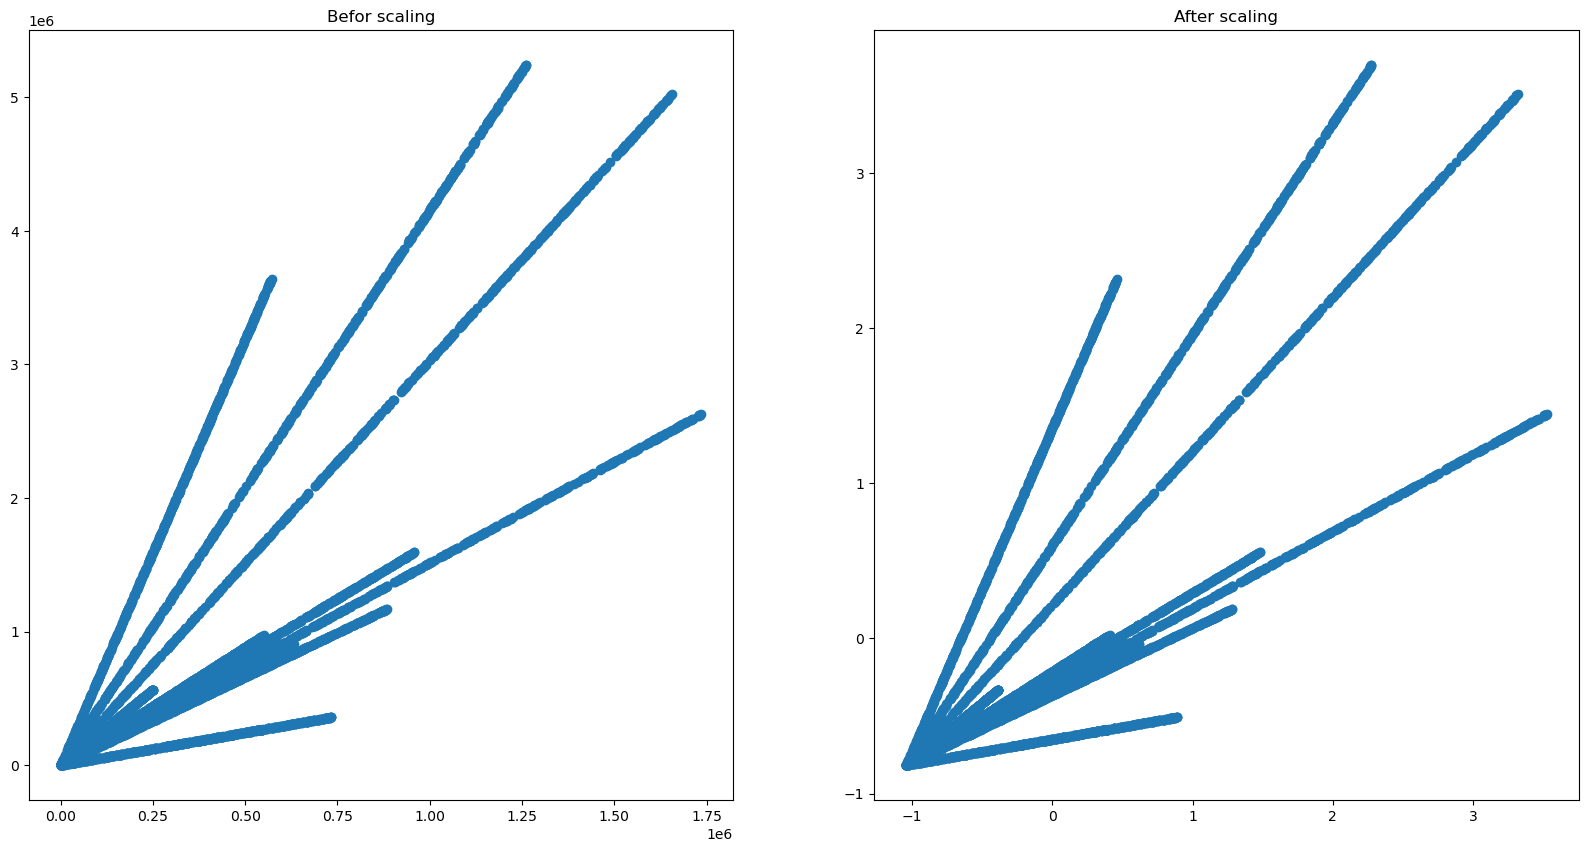

In [32]:
fig,(a1,a2)=plt.subplots(ncols=2,figsize=(20,10))
a1.scatter(x_train["Total Profit"],x_train["Total Cost"])
a1.set_title("Befor scaling")
a2.scatter(x_train_scaler["Total Profit"],x_train_scaler["Total Cost"])
a2.set_title("After scaling")
plt.show()

In [33]:
df

,Total Revenue,Total Cost,Total Profit
0,2920025.64,2353920.64,566105.00
1,51008.75,34174.25,16834.50
2,1003700.90,592408.95,411291.95
3,5134318.41,3861014.82,1273303.59
4,165647.95,110978.89,54669.06
...,...,...,...
9998,3672974.34,3174991.14,497983.20
9999,55081.38,35175.84,19905.54
10000,388847.44,229507.32,159340.12
10001,3672974.34,3174991.14,497983.20


# MinMax-scaler and Standard Scaler

In [34]:
scaler=MinMaxScaler()

In [35]:
zscore_scaler = StandardScaler()
sales_scaled = zscore_scaler.fit_transform(df)

In [36]:
sales_scaled

array([[ 1.08303898,  1.23528881,  0.4531479 ],
       [-0.87532603, -0.78899218, -1.00184685],
       [-0.22502697, -0.30185966,  0.04305456],
       ...,
       [-0.64472039, -0.61853862, -0.62435538],
       [ 1.59699496,  1.9517798 ,  0.27269608],
       [-0.87254609, -0.78811816, -0.99371179]])

In [37]:
scaler.fit(x_train,y_train)

MinMaxScaler()

In [38]:
x_train_scaler=scaler.transform(x_train)
x_test_scaler=scaler.transform(x_test)

In [39]:
x_train_scaler

array([[0.02981273, 0.05416493],
       [0.03618819, 0.22410129],
       [0.1450832 , 0.26352255],
       ...,
       [0.0410388 , 0.02980323],
       [0.12590892, 0.05963548],
       [0.47730355, 0.34670991]])

In [40]:
x_test_scaler

array([[0.15046799, 0.31556078],
       [0.30231133, 0.60293567],
       [0.06274828, 0.08381867],
       ...,
       [0.05433752, 0.05412474],
       [0.50164064, 0.36438859],
       [0.13964095, 0.23869692]])

In [41]:
x_train_scaler=pd.DataFrame(x_train_scaler,columns=x_train.columns)
x_test_scaler=pd.DataFrame(x_test_scaler,columns=x_test.columns)

In [42]:
x_train_scaler

,Total Cost,Total Profit
0,0.029813,0.054165
1,0.036188,0.224101
2,0.145083,0.263523
3,0.043216,0.073883
4,0.239185,0.434434
...,...,...
6997,0.041030,0.061059
6998,0.030110,0.051481
6999,0.041039,0.029803
7000,0.125909,0.059635


In [43]:
x_test_scaler

,Total Cost,Total Profit
0,0.150468,0.315561
1,0.302311,0.602936
2,0.062748,0.083819
3,0.051589,0.076770
4,0.008024,0.049786
...,...,...
2996,0.147577,0.294342
2997,0.294374,0.587105
2998,0.054338,0.054125
2999,0.501641,0.364389


In [44]:
np.round(x_train_scaler.describe(),1)

,Total Cost,Total Profit
count,7002.0,7002.0
mean,0.2,0.2
std,0.2,0.2
min,0.0,0.0
25%,0.0,0.1
50%,0.1,0.2
75%,0.2,0.3
max,1.0,1.0


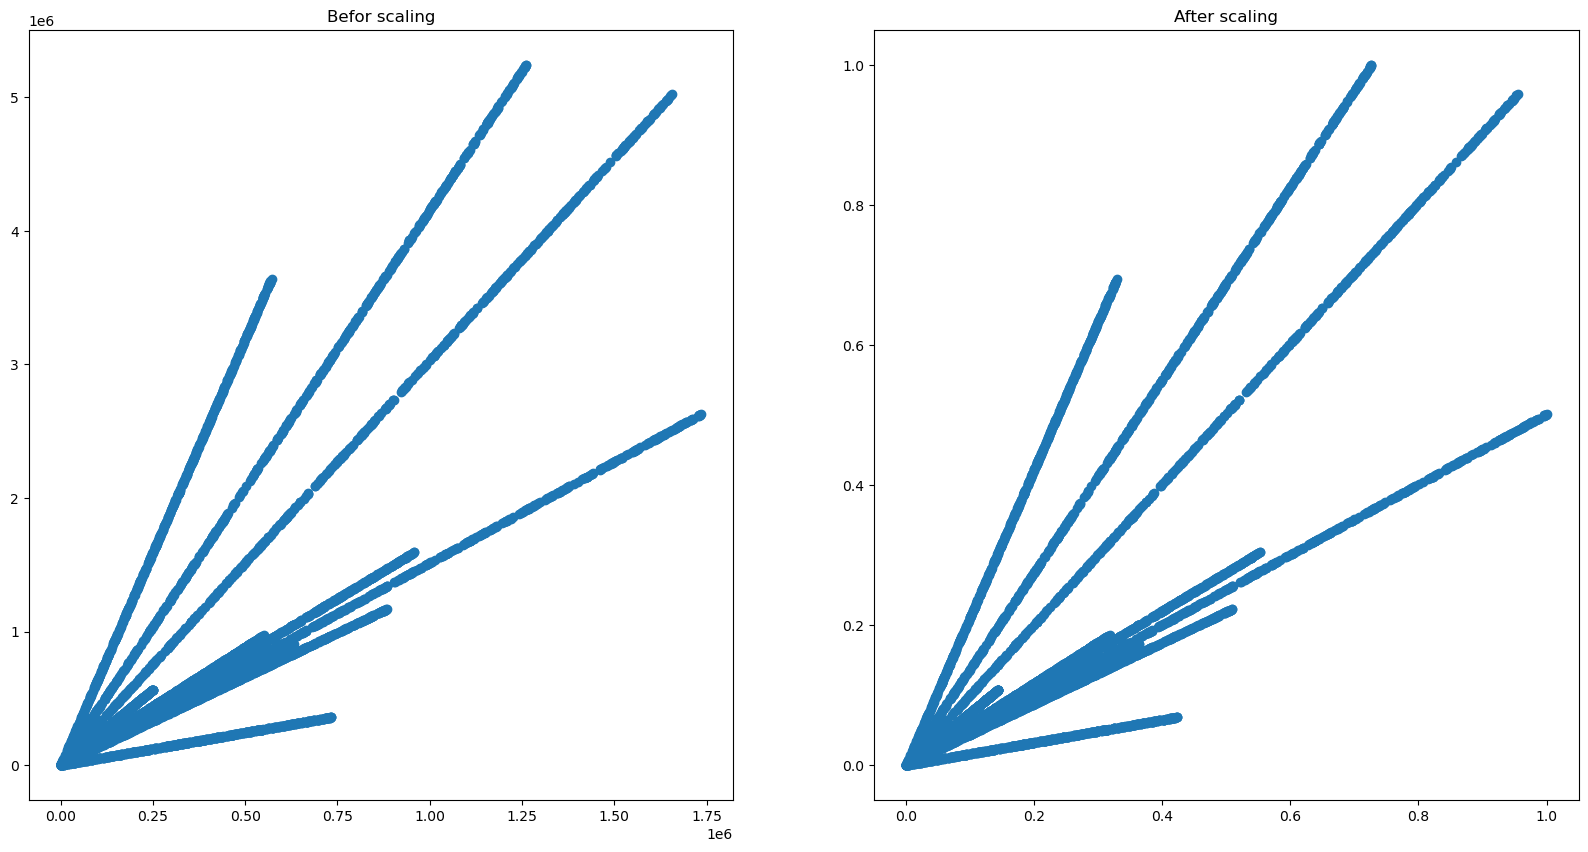

In [45]:
fig,(a1,a2)=plt.subplots(ncols=2,figsize=(20,10))
a1.scatter(x_train["Total Profit"],x_train["Total Cost"])
a1.set_title("Befor scaling")
a2.scatter(x_train_scaler["Total Profit"],x_train_scaler["Total Cost"])
a2.set_title("After scaling")
plt.show()